# Data Transformation
## IS2A5 2024
### Comparaison PySpark Pandas Polars

## Setup

To get started, you'll first need to pull the alexmerced/spark35nb Docker image from Docker Hub. 

This image comes with a pre-configured environment that includes Spark 3.5.2, JupyterLab, and many popular data manipulation libraries like Pandas, DuckDB, and Polars.

In [ ]:
!docker pull alexmerced/spark35nb

In [ ]:
docker run --name demo_transfo -p 8888:8888 -p 4040:4040 -p 7077:7077 -p 8080:8080 -p 18080:18080 -p 6066:6066 -p 7078:7078 -p 8081:8081  alexmerced/spark35nbdocker run -p 8888:8888 -p 4040:4040 -p 7077:7077 -p 8080:8080 -p 18080:18080 -p 6066:6066 -p 7078:7078 -p 8081:8081  alexmerced/spark35nb

or

In [ ]:
!docker start --name demo_transfo

go to : http://localhost:8888/

Copy the notebook in the JUpyterLab

Now that you have your environment set up, we can move on to performing some basic data operations using PySpark, Pandas, DuckDB, Polars

Download the dataset : https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset

Import it in the Jupyterlab dir

In [11]:
file_name = 'realtor-data.zip.csv'

## Section 2: Working with PySpark

### 2.1 What is PySpark?
PySpark is the Python API for Apache Spark, an open-source engine designed for large-scale data processing and distributed computing. It allows you to work with big data by distributing data and computations across a cluster. While Spark is usually run in a distributed cluster, this setup allows you to run it locally on a single node perfect for development and testing.

Using PySpark, you can perform data manipulation, SQL queries, machine learning, and more, all within a framework that handles big data efficiently. In this section, we'll walk through how to write and query data using PySpark in the JupyterLab environment.

### 2.2 Writing Data with PySpark
Let’s start by creating a simple dataset in PySpark. First, initialize a Spark session, which is necessary to interact with Spark's functionality. We will create a small DataFrame with sample data and display it.

In [8]:
from pyspark.sql import SparkSession

# Initialize the Spark session
spark = SparkSession.builder.appName("PySpark Example").getOrCreate()

# Sample data: a list of tuples containing names and ages
data = [("Alice", 34), ("Bob", 45), ("Catherine", 29)]

# Create a DataFrame
df = spark.createDataFrame(data, ["Name", "Age"])

# Show the DataFrame
df.show()

+---------+---+
|     Name|Age|
+---------+---+
|    Alice| 34|
|      Bob| 45|
|Catherine| 29|
+---------+---+



In this example, we created a DataFrame with three rows of data, representing people's names and ages. The df.show() function allows us to display the contents of the DataFrame, making it easy to inspect the data we just created.

### 2.3 Loading and Querying Data with PySpark

Next, let’s load a dataset from a file and run some basic queries. PySpark can handle various file formats, including CSV, JSON, and Parquet.

For this example, let’s assume we have a CSV file with more data about people, which we’ll load into a DataFrame. Then we’ll demonstrate a simple filter query and aggregation to count the number of people in each age group.

In [15]:
# Load a CSV file into a DataFrame
df_csv = spark.read.csv(file_name, header=True, inferSchema=True)

# Show the first few rows of the DataFrame
df_csv.show()

+-----------+--------+--------+---+----+--------+---------+-------------+-----------+--------+----------+--------------+
|brokered_by|  status|   price|bed|bath|acre_lot|   street|         city|      state|zip_code|house_size|prev_sold_date|
+-----------+--------+--------+---+----+--------+---------+-------------+-----------+--------+----------+--------------+
|   103378.0|for_sale|105000.0|  3|   2|    0.12|1962661.0|     Adjuntas|Puerto Rico|     601|     920.0|          NULL|
|    52707.0|for_sale| 80000.0|  4|   2|    0.08|1902874.0|     Adjuntas|Puerto Rico|     601|    1527.0|          NULL|
|   103379.0|for_sale| 67000.0|  2|   1|    0.15|1404990.0|   Juana Diaz|Puerto Rico|     795|     748.0|          NULL|
|    31239.0|for_sale|145000.0|  4|   2|     0.1|1947675.0|        Ponce|Puerto Rico|     731|    1800.0|          NULL|
|    34632.0|for_sale| 65000.0|  6|   2|    0.05| 331151.0|     Mayaguez|Puerto Rico|     680|      NULL|          NULL|
|   103378.0|for_sale|179000.0| 

In [17]:
df_filtered = df_csv.filter(df_csv["price"] > 10000)

# Show the filtered DataFrame
df_filtered.show()

+-----------+--------+--------+---+----+--------+---------+-------------+-----------+--------+----------+--------------+
|brokered_by|  status|   price|bed|bath|acre_lot|   street|         city|      state|zip_code|house_size|prev_sold_date|
+-----------+--------+--------+---+----+--------+---------+-------------+-----------+--------+----------+--------------+
|   103378.0|for_sale|105000.0|  3|   2|    0.12|1962661.0|     Adjuntas|Puerto Rico|     601|     920.0|          NULL|
|    52707.0|for_sale| 80000.0|  4|   2|    0.08|1902874.0|     Adjuntas|Puerto Rico|     601|    1527.0|          NULL|
|   103379.0|for_sale| 67000.0|  2|   1|    0.15|1404990.0|   Juana Diaz|Puerto Rico|     795|     748.0|          NULL|
|    31239.0|for_sale|145000.0|  4|   2|     0.1|1947675.0|        Ponce|Puerto Rico|     731|    1800.0|          NULL|
|    34632.0|for_sale| 65000.0|  6|   2|    0.05| 331151.0|     Mayaguez|Puerto Rico|     680|      NULL|          NULL|
|   103378.0|for_sale|179000.0| 

In [18]:
df_grouped = df_csv.groupBy("city").count()

# Show the result of the grouping
df_grouped.show()

+-------------+-----+
|         city|count|
+-------------+-----+
|       Agawam|  184|
|  Middlefield|   88|
|    Worcester|  920|
|       Nahant|   20|
|      Hanover|  882|
|    Shapleigh|   14|
|      Palermo|   31|
| Saint George|  486|
|  Cherryfield|    5|
|   Westampton|   53|
|     Plumsted|   10|
|    Rhinebeck|  116|
|     DeRuyter|   10|
|        Owego|   51|
|      Antwerp|   25|
|     Fredonia|  139|
|    Monroeton|    6|
|Harrison City|   14|
|     Rawlings|   16|
| Fallentimber|    3|
+-------------+-----+
only showing top 20 rows



## Section 3: Data Manipulation with Pandas

### 3.1 What is Pandas?
Pandas is one of the most widely used Python libraries for data manipulation and analysis. It provides easy-to-use data structures, like DataFrames, which allow you to work with tabular data in an intuitive way.

Unlike PySpark, which is designed for large-scale distributed data processing, Pandas works in-memory, making it ideal for small to medium-sized datasets.

With Pandas, you can read and write data from various formats, including CSV, Excel, and JSON, and perform common data operations like filtering, aggregating, and merging data with simple and readable syntax.

### 3.2 Loading Data with Pandas
Let’s start by loading a dataset into a Pandas DataFrame.

We’ll read a CSV file, which is a common file format for data storage, and display the first few rows.

In [20]:
import pandas as pd

# Load a CSV file into a Pandas DataFrame
df_pandas = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
print(df_pandas.head())

   brokered_by    status     price  bed  bath  acre_lot     street  \
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4      34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   

         city        state  zip_code  house_size prev_sold_date  
0    Adjuntas  Puerto Rico     601.0       920.0            NaN  
1    Adjuntas  Puerto Rico     601.0      1527.0            NaN  
2  Juana Diaz  Puerto Rico     795.0       748.0            NaN  
3       Ponce  Puerto Rico     731.0      1800.0            NaN  
4    Mayaguez  Puerto Rico     680.0         NaN            NaN  


### 3.3 Basic Operations with Pandas

In [23]:
# Filter the data to show only people older than 30
df_filtered = df_pandas[df_pandas["price"] > 100000]

# Display the filtered data
print(df_filtered)

# Group the data by 'Age' and count the number of people in each age group
df_grouped = df_pandas.groupby("city").count()

# Display the grouped data
print(df_grouped)

         brokered_by    status     price  bed  bath  acre_lot     street  \
0           103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
3            31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
5           103378.0  for_sale  179000.0  4.0   3.0      0.46  1850806.0   
9            65672.0  for_sale  300000.0  5.0   3.0      7.46  1946226.0   
11           52707.0  for_sale  150000.0  3.0   2.0      0.08  1773902.0   
...              ...       ...       ...  ...   ...       ...        ...   
2226377      23009.0      sold  359900.0  4.0   2.0      0.33   353094.0   
2226378      18208.0      sold  350000.0  3.0   2.0      0.10  1062149.0   
2226379      76856.0      sold  440000.0  6.0   3.0      0.50   405677.0   
2226380      53618.0      sold  179900.0  2.0   1.0      0.09   761379.0   
2226381     108243.0      sold  580000.0  5.0   3.0      0.31   307704.0   

                  city        state  zip_code  house_size prev_sold_date  
0           

### However, when you start working with larger datasets (think over 2GB), you might find yourself running into "OutOfMemory"

## Section 4: Exploring DuckDB

### 4.1 What is DuckDB?
DuckDB is an in-memory SQL database management system (DBMS) designed for analytical workloads. It offers high-performance, efficient querying of datasets directly within your Python environment. DuckDB is particularly well-suited for performing complex SQL queries on structured data, like CSVs or Parquet files, without needing to set up a separate database server.

DuckDB is lightweight, yet powerful, and can be used as an alternative to tools like SQLite, especially when working with analytical queries on large datasets.

### 4.2 Writing Data into DuckDB
DuckDB can easily integrate with Pandas, allowing you to transfer data from a Pandas DataFrame into DuckDB for SQL-based queries. 

Here’s how to create a table in DuckDB using the data from Pandas.

In [31]:
import duckdb

# Connect to an in-memory DuckDB instance
conn = duckdb.connect()

# Create a table in DuckDB from the Pandas DataFrame
conn.execute("CREATE TABLE estate AS SELECT * FROM df_pandas")

# Show the content of the 'people' table
conn.execute("SELECT * FROM estate").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,None
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,None
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,None
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,None
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


In this example, we connected to DuckDB and created a new table people from the Pandas DataFrame df_pandas. DuckDB’s execute() function allows you to run SQL commands, making it easy to interact with data using SQL queries.

### 4.3 Querying Data in DuckDB

Once your data is loaded into DuckDB, you can run SQL queries to filter, aggregate, and analyze your data. DuckDB supports a wide range of SQL functionality, making it ideal for users who prefer SQL over Python for data manipulation.

In [33]:
result = conn.execute("SELECT bath FROM estate WHERE bath > 3").df()

# Display the result of the query
print(result)

        bath
0        5.0
1        4.0
2        4.0
3        4.0
4        4.0
...      ...
236360   4.0
236361   4.0
236362   4.0
236363   4.0
236364   4.0

[236365 rows x 1 columns]


In [34]:
result_grouped = conn.execute("SELECT city, COUNT(*) as count FROM estate GROUP BY city").df()

# Display the grouped result
print(result_grouped)

                   city  count
0            Long Grove    107
1         North Chicago     62
2          Bloomingdale    311
3                Dekalb    309
4           South Elgin    262
...                 ...    ...
20094  Oakwood Township      1
20095           Ruthton      1
20096       Twin Valley      1
20097            Winger      1
20098            Souris      1

[20099 rows x 2 columns]


DuckDB is an excellent choice when you need SQL-like functionality directly in your Python environment.

It allows you to leverage the power of SQL without the overhead of setting up and managing a database server.

In the next section, we will explore Polars, a DataFrame library known for its speed and efficiency.

## Section 5: Leveraging Polars for Fast DataFrame Operations

### 5.1 What is Polars?
Polars is a much newer Python package than Pandas. It was first released in 2020 by a software engineer named Ritchie Vink and has gained a ton of popularity over the past couple of years.

Polars is a DataFrame library designed for high-performance data manipulation.
                                      
- It’s known for its speed and efficiency, particularly when compared to libraries like Pandas.

- Polars is written in Rust and uses an optimized query engine to handle large datasets quickly and with minimal memory usage.

- It also provides a similar interface to Pandas, making it easy to learn and integrate into existing Python workflows.

- Polars is particularly well-suited for processing large datasets that might not fit into memory as easily or for scenarios where performance is a critical factor.

- Polars uses Apache Arrow as its memory format and is built around "data frames" and "series" data structures.

### 5.2 Working with Polars
Let’s start by creating a Polars DataFrame from a Python dictionary.

We’ll then perform some basic operations like filtering and aggregating data.

In [36]:
import polars as pl

# Create a Polars DataFrame
df_polars = pl.DataFrame({
    "Name": ["Alice", "Bob", "Catherine"],
    "Age": [34, 45, 29]
})

# Display the Polars DataFrame
print(df_polars)

shape: (3, 2)
┌───────────┬─────┐
│ Name      ┆ Age │
│ ---       ┆ --- │
│ str       ┆ i64 │
╞═══════════╪═════╡
│ Alice     ┆ 34  │
│ Bob       ┆ 45  │
│ Catherine ┆ 29  │
└───────────┴─────┘


Here you can see that in difference from pandas, polars show types ( str exists) and there isn't indices

In this example, we created a Polars DataFrame using a Python dictionary. The syntax is similar to Pandas, but the operations are optimized for speed.
                                                                                                                                           
Polars offers lazy evaluation, which means it can optimize the execution of multiple operations at once, reducing computation time.

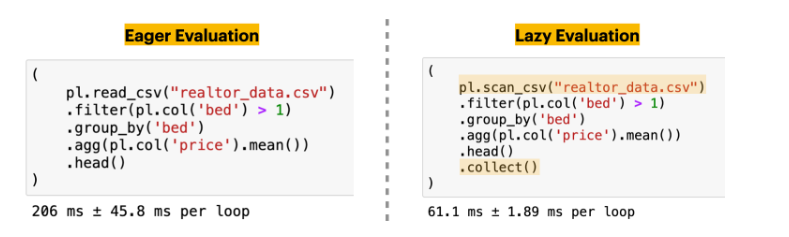

### A promoicing new feature : Streaming


If you want layer on Polar's streaming abilities, you simply need to pass streaming=True into the collect() method like this:

The streaming API allows for larger-than-memory data processing because it executes the query plan in batches rather than all at once. This feature is still in active development so it doesn't support all Polars operations yet.



In [54]:
(
  pl.scan_csv(file_name)
  .filter(pl.col("bed") > 1)
  .group_by("bed")
  .agg(pl.col('price').mean())
  .collect(streaming=True)
)


bed,price
i64,f64
42,5013205.2
55,7.19e6
63,6.5817e6
38,3.1692e6
23,3.9631e6
…,…
60,7.65e6
11,2.9947e6
35,5974362.5


### 5.3 Filtering and Aggregating with Polars

Now, let’s perform some common data operations such as filtering and aggregating the data.

These operations are highly optimized in Polars and can be done using a simple and expressive syntax


In [44]:
df_polars = pl.read_csv(file_name)

df_filtered = df_polars.filter(pl.col("price") > 2000000)

# Display the filtered DataFrame
print(df_filtered)


shape: (63_695, 12)
┌─────────────┬──────────┬────────┬──────┬───┬─────────────┬──────────┬────────────┬───────────────┐
│ brokered_by ┆ status   ┆ price  ┆ bed  ┆ … ┆ state       ┆ zip_code ┆ house_size ┆ prev_sold_dat │
│ ---         ┆ ---      ┆ ---    ┆ ---  ┆   ┆ ---         ┆ ---      ┆ ---        ┆ e             │
│ f64         ┆ str      ┆ f64    ┆ i64  ┆   ┆ str         ┆ i64      ┆ f64        ┆ ---           │
│             ┆          ┆        ┆      ┆   ┆             ┆          ┆            ┆ str           │
╞═════════════╪══════════╪════════╪══════╪═══╪═════════════╪══════════╪════════════╪═══════════════╡
│ 63639.0     ┆ for_sale ┆ 3.9e6  ┆ 6    ┆ … ┆ Puerto Rico ┆ 624      ┆ 9297.0     ┆ null          │
│ 55906.0     ┆ for_sale ┆ 1e7    ┆ 6    ┆ … ┆ Puerto Rico ┆ 602      ┆ 6000.0     ┆ null          │
│ 66561.0     ┆ for_sale ┆ 3.25e6 ┆ null ┆ … ┆ Puerto Rico ┆ 602      ┆ null       ┆ null          │
│ 92147.0     ┆ for_sale ┆ 8e6    ┆ null ┆ … ┆ Puerto Rico ┆ 603      ┆

In [46]:
# Group by 'city' and count the number of city in each age group
df_grouped = df_polars.group_by("city").count()

# Display the grouped result
print(df_grouped)

/tmp/ipykernel_194/2403647299.py:2: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  df_grouped = df_polars.group_by("city").count()


shape: (20_099, 2)
┌───────────────────┬───────┐
│ city              ┆ count │
│ ---               ┆ ---   │
│ str               ┆ u32   │
╞═══════════════════╪═══════╡
│ Prompton          ┆ 3     │
│ Islandton         ┆ 7     │
│ Panama City Beach ┆ 1958  │
│ Cape San Blas     ┆ 66    │
│ Nisland           ┆ 4     │
│ …                 ┆ …     │
│ Cape Haze         ┆ 1     │
│ Lawrence Township ┆ 41    │
│ North Miami       ┆ 429   │
│ Caneyville        ┆ 9     │
│ Tecumseh          ┆ 191   │
└───────────────────┴───────┘


These operations are highly efficient in Polars due to its optimized memory management and query execution engine.

Polars is ideal when you need the speed of a DataFrame library for both small and large datasets, and when performance is a key requirement.

## Section 6 Pandas (version2)

In 2017, Wes McKinney, the creator of Pandas, published an article called "Apache Arrow and the 10 Things I Hate About Pandas" where he walked through the shortcomings of Pandas.

The TL;DR of the article is that Pandas (version 1) was not built to handle large non-numerical data like strings.

The plan was to replace Pandas' NumPy backend with a brand new columnar memory format called Apache Arrow.

In April 2023, Pandas v2.0 was released and as promised, Apache Arrow replaced NumPy as the memory format in the backend. This transition to Arrow resulted in several big improvements for Pandas:

- Better support of missing values
- More efficient data types. string[pyarrow] replaces the object data type.
- Speed! Pandas version 2.0 is a whole lot faster than version 1.0. This is especially true for string-related operations. For example, the endswith() method is 31.6 times faster with an Apache Arrow backend as compared to NumPy. Incredible.

Pandas v3 is in the works                                                              

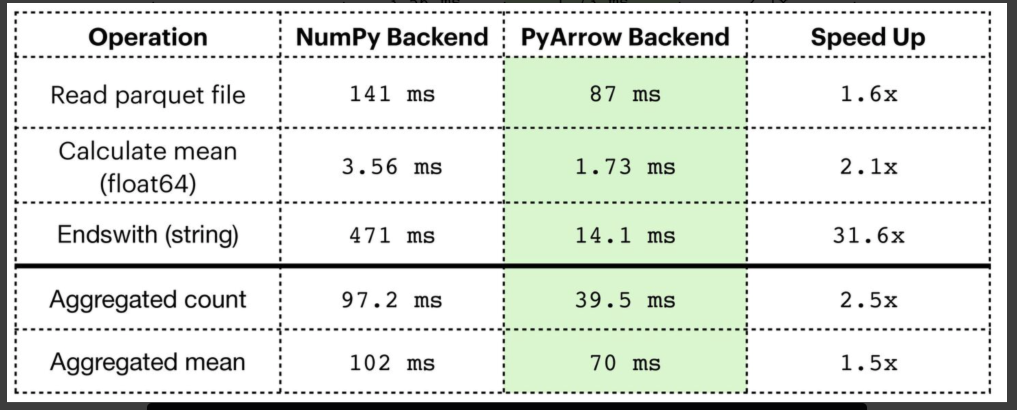

It's very simple to set up a Pandas DataFrame with an Apache Arrow backend. You simply need to specify "pyarrow" as the backend when you read in your data file:

In [50]:
import pandas as pd 

df_v2 = pd.read_csv(file_name, dtype_backend="pyarrow")
df_v2.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3,2,0.12,1962661.0,Adjuntas,Puerto Rico,601,920.0,<NA>
1,52707.0,for_sale,80000.0,4,2,0.08,1902874.0,Adjuntas,Puerto Rico,601,1527.0,<NA>
2,103379.0,for_sale,67000.0,2,1,0.15,1404990.0,Juana Diaz,Puerto Rico,795,748.0,<NA>
3,31239.0,for_sale,145000.0,4,2,0.1,1947675.0,Ponce,Puerto Rico,731,1800.0,<NA>
4,34632.0,for_sale,65000.0,6,2,0.05,331151.0,Mayaguez,Puerto Rico,680,<NA>,<NA>


On the surface, you may not notice any changes to your DataFrame. But if you inspect the data, you'll see that the column data types are all pyarrow 🎉.

In [52]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype          
---  ------          -----          
 0   brokered_by     double[pyarrow]
 1   status          string[pyarrow]
 2   price           double[pyarrow]
 3   bed             int64[pyarrow] 
 4   bath            int64[pyarrow] 
 5   acre_lot        double[pyarrow]
 6   street          double[pyarrow]
 7   city            string[pyarrow]
 8   state           string[pyarrow]
 9   zip_code        int64[pyarrow] 
 10  house_size      double[pyarrow]
 11  prev_sold_date  string[pyarrow]
dtypes: double[pyarrow](5), int64[pyarrow](3), string[pyarrow](4)
memory usage: 237.5 MB


## Credits

https://hackernoon.com/exploring-data-operations-with-pyspark-pandas-duckdb-polars-and-datafusion-in-a-python-notebook

https://www.normallydistributed.com/pandas-polars-duckdb/

https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset